In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
num_runs = 250
num_visits_list = range(1,11)

msbi_rel = {}
msbi_std = {}
msbi_bayes_rel = {}
msbi_bayes_std = {}


for num_visits in num_visits_list:
    thing = "_ground_truths"
    for string, name in [("msbi", "msbi"+thing), ("grad", "grad"+thing)]:
        globals()[name] = np.array([(np.load(f"synthetic_mdps/msbi/M{num_visits}/run{run}/{string}{thing}.npy")) for run in range(num_runs)])

    thing = "_bayes_values"
    for string, name in [("msbi", "msbi"+thing), ("grad", "grad"+thing)]:
        globals()[name] = np.array([(np.load(f"synthetic_mdps/msbi/M{num_visits}/run{run}/{string}{thing}.npy")) for run in range(num_runs)])

    msbi_rel[num_visits] = (grad_ground_truths - msbi_ground_truths).mean()
    msbi_std[num_visits] = (grad_ground_truths - msbi_ground_truths).std(ddof=1)
    msbi_bayes_rel[num_visits] = (grad_bayes_values - msbi_bayes_values).mean()
    msbi_bayes_std[num_visits] = (grad_bayes_values - msbi_bayes_values).std(ddof=1)

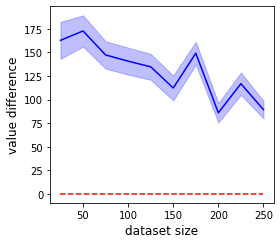

In [7]:
dataset_sizes = [25*m for m in num_visits_list]
policy = "msbi"

plt.figure(figsize=(4,3.5))
    
x = (np.array(dataset_sizes))

y = msbi_rel
std = msbi_std

y = np.array([y[i] for i in num_visits_list])
std = np.array([std[i] for i in num_visits_list])/np.sqrt(num_runs)

plt.hlines(0, x[0], x[-1], color='r', linestyles='dashed')
plt.plot(x, y, color='b')

plt.fill_between((np.array(dataset_sizes)), y+std, y-std, color='b', alpha = 0.25)

plt.xlabel("dataset size", fontsize=12)
plt.ylabel(f"value difference", fontsize=12)
plt.tight_layout()

if not os.path.isdir("synthetic_msbi_figures"):
    os.mkdir("synthetic_msbi_figures")
plt.savefig(f'synthetic_msbi_figures/{policy}_ground_truth.pdf')
plt.show()

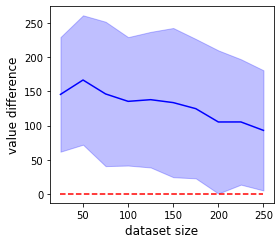

In [8]:
dataset_sizes = [25*m for m in num_visits_list]
policy = "msbi"

plt.figure(figsize=(4,3.5))
    
x = (np.array(dataset_sizes))

y = msbi_bayes_rel
std = msbi_bayes_std

y = np.array([y[i] for i in num_visits_list])
std = np.array([std[i] for i in num_visits_list])

plt.hlines(0, x[0], x[-1], color='r', linestyles='dashed')
plt.plot(x, y, color='b')

plt.fill_between((np.array(dataset_sizes)), y+std, y-std, color='b', alpha = 0.25)

plt.xlabel("dataset size", fontsize=12)#, labelsize=9)
plt.ylabel(f"value difference", fontsize=12)#, labelsize=9)
plt.tight_layout()

if not os.path.isdir("synthetic_msbi_figures"):
    os.mkdir("synthetic_msbi_figures")
plt.savefig(f'synthetic_figures/{policy}_bayes.pdf')
plt.show()